In [1]:
import numpy as np,random,operator,pandas as pd,matplotlib.pyplot as plt,math, heapq, sys, time

In [2]:
class Graph:
    def __init__(self,cities,dist_mat=[]):
        self.cities=cities
        self.dist_mat=[[math.inf for i in range(cities)] for j in range(cities)]
        for i in range(cities):
            for j in range(cities):
                
                if (self.dist_mat[i][j]==math.inf):
                    
                    if i!=j:
                        x=(random.random()*100)//1
                        if x<25:
                            x=math.inf
                        self.dist_mat[i][j]=x
                        self.dist_mat[j][i]=x
                    else:
                        self.dist_mat[i][j]=0

In [3]:
class Fitness:
    def __init__(self,route):
        self.route=route
        self.distance=0
        self.fitness=0
    def routeDistance(self,source,destination,dist_mat):
        if self.distance==0:
            pathDistance=0
            for i in range(0,len(self.route)):
                fromCity=self.route[i]
                toCity=None
                if fromCity==None:
                    continue
                if i+1<len(self.route):
                    toCity=self.route[i+1]
                if toCity!=None:
                    pathDistance+=dist_mat[fromCity][toCity]
            self.distance=pathDistance
            
            self.distance=self.distance+dist_mat[source][self.route[0]]+dist_mat[destination][self.route[len(self.route)-1]]
        return self.distance
    def routeFitness(self,source,destination,dist_mat):
        if self.fitness==0:
            self.fitness=1/float(self.routeDistance(source,destination,dist_mat))
            
        return self.fitness

In [4]:
def initialPopulation(popSize,cityList,size=None):
    population=[]
    if size==None:
        size=len(cityList)
    
    for i in range(popSize-1):
        population.append(createRoute(cityList,size))
    
    return population

In [5]:
def createRoute(cityList,size):
   
    route=random.sample(cityList,size)
    
    return route

#createRoute([i for i in range(25)])

In [6]:
def rankRoutes(population,source,destination,dist_mat):
    fitnessResults={}
    for i in range(len(population)):
        fitnessResults[i]=Fitness(population[i]).routeFitness(source,destination,dist_mat)
    
    return sorted(fitnessResults.items(),key=operator.itemgetter(1),reverse=True)


In [7]:

def nextGeneration(currentGen, eliteSize, mutationRate,source,destination,dist_mat):
    popRanked = rankRoutes(currentGen,source,destination,dist_mat)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [8]:
def selection(popRanked,eliteSize):
    selectionResults=[]
    df=pd.DataFrame(np.array(popRanked),columns=["Index","Fitness"])
    df['cum_sum']=df.Fitness.cumsum()
    df['cum_perc']=100*df.cum_sum/df.Fitness.sum()
    for i in range(eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0,len(popRanked)-eliteSize):
        pick=100*random.random()
        for i in range(len(popRanked)):
            if pick<=df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [9]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [10]:

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [12]:

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [36]:
def geneticAlgorithm(g,population, popSize, eliteSize, mutationRate, generations,source,destination,size=None):
    
    #g=Graph(len(population))
    #print(population)
    #print(source,destination)
  
    #population.remove(destination)
    
    
    
    pop = initialPopulation(popSize, population,size)
    progress = []
    progress.append(1 / rankRoutes(pop,source,destination,g.dist_mat)[0][1])
    
    x=rankRoutes(pop,source,destination,g.dist_mat)
    #print(x)
    minDist=1/x[0][1]
    minDistRouteIndex=x[0][0]
    minDistRoute=pop[minDistRouteIndex]
    print("Initial distance:",1/x[0][1] )
    
    
    #print("Initial distance: " + str(1/x[0][1])
          
    
    
    for i in range(0, generations):
        
          
        pop = nextGeneration(pop, eliteSize, mutationRate,source,destination,g.dist_mat)
        
        
        x=rankRoutes(pop,source,destination,g.dist_mat)
        progress.append(1 / x[0][1])
        if 1/x[0][1]<minDist:
            

            minDist=1/x[0][1]
            minDistRouteIndex=x[0][0]
            minDistRoute=pop[minDistRouteIndex]
    print("Final distance: " + str(1 / rankRoutes(pop,source,destination,g.dist_mat)[0][1]))

    finalRouteIndex = rankRoutes(pop,source,destination,g.dist_mat)[0][0]
    finalRoute = pop[finalRouteIndex]
    myShortRoute=[]
    for i in minDistRoute:
          if i not in myShortRoute:
                myShortRoute.append(i)
    print(minDist,': route =',minDistRoute)
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return minDistRoute,minDist    

Initial distance: 1379.0
Final distance: 892.0
873.0 : route = [23, 9, 8, 0, 14, 4, 7, 18, 12, 20, 10, 15, 17, 11, 6, 16, 5, 22, 24, 19, 21, 13, 1, 2]


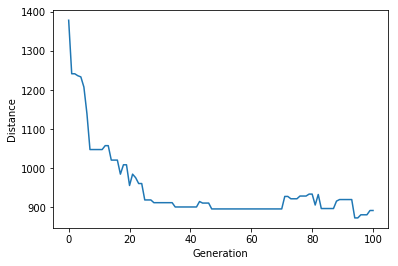

[23, 9, 8, 0, 14, 4, 7, 18, 12, 20, 10, 15, 17, 11, 6, 16, 5, 22, 24, 19, 21, 13, 1, 2]
Initial distance: 1264.0
Final distance: 848.0
835.0 : route = [23, 10, 1, 13, 15, 0, 8, 22, 19, 4, 20, 24, 21, 5, 14, 9, 7, 16, 6, 11, 17, 18, 12]


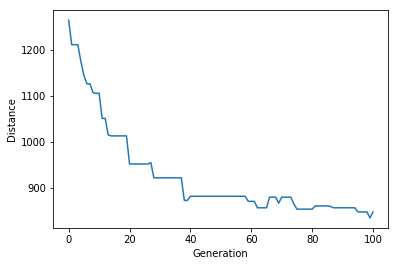

[23, 10, 1, 13, 15, 0, 8, 22, 19, 4, 20, 24, 21, 5, 14, 9, 7, 16, 6, 11, 17, 18, 12]
Initial distance: 1233.0
Final distance: 751.0
751.0 : route = [23, 10, 20, 24, 21, 19, 15, 16, 1, 12, 9, 5, 7, 8, 22, 17, 6, 4, 11, 0, 14, 2]


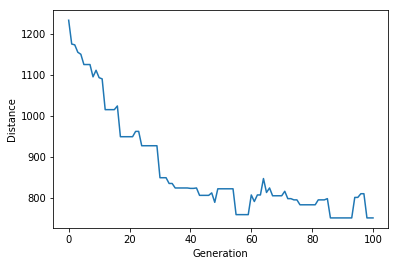

[23, 10, 20, 24, 21, 19, 15, 16, 1, 12, 9, 5, 7, 8, 22, 17, 6, 4, 11, 0, 14, 2]
Initial distance: 1129.0
Final distance: 733.0
733.0 : route = [23, 9, 11, 17, 10, 20, 24, 19, 6, 21, 2, 4, 18, 12, 5, 16, 14, 13, 1, 8, 0]


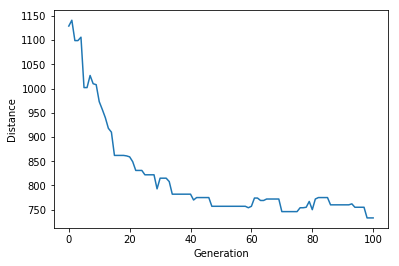

[23, 9, 11, 17, 10, 20, 24, 19, 6, 21, 2, 4, 18, 12, 5, 16, 14, 13, 1, 8, 0]
Initial distance: 1097.0
Final distance: 679.0
679.0 : route = [23, 15, 14, 10, 17, 5, 13, 6, 16, 7, 11, 0, 8, 20, 24, 21, 2, 4, 18, 12]


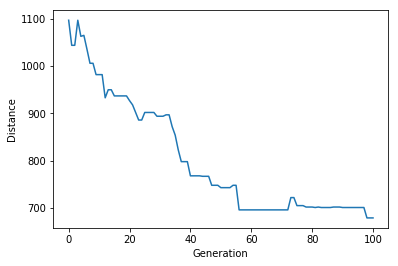

[23, 15, 14, 10, 17, 5, 13, 6, 16, 7, 11, 0, 8, 20, 24, 21, 2, 4, 18, 12]
Initial distance: 1056.0
Final distance: 683.0
683.0 : route = [17, 22, 5, 14, 18, 15, 11, 0, 8, 2, 1, 13, 10, 12, 20, 24, 4, 7, 16]


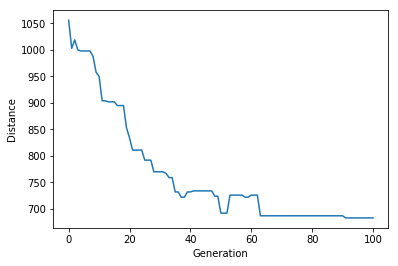

[17, 22, 5, 14, 18, 15, 11, 0, 8, 2, 1, 13, 10, 12, 20, 24, 4, 7, 16]
Initial distance: 1024.0
Final distance: 717.0
716.0 : route = [23, 1, 10, 14, 21, 5, 9, 8, 20, 24, 4, 15, 2, 16, 17, 6, 11, 22, 18, 12]


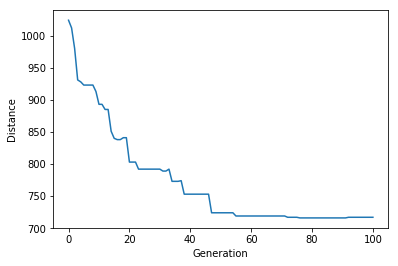

[23, 1, 10, 14, 21, 5, 9, 8, 20, 24, 4, 15, 2, 16, 17, 6, 11, 22, 18, 12]
Initial distance: 1030.0
Final distance: 661.0
661.0 : route = [23, 20, 12, 18, 17, 16, 6, 21, 19, 24, 1, 2, 4, 0, 11, 22, 5, 9, 14]


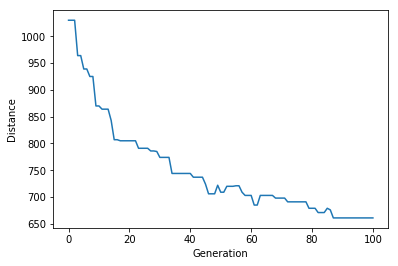

[23, 20, 12, 18, 17, 16, 6, 21, 19, 24, 1, 2, 4, 0, 11, 22, 5, 9, 14]
Initial distance: 994.9999999999999
Final distance: 649.0
649.0 : route = [23, 17, 6, 8, 4, 24, 19, 21, 12, 9, 5, 0, 2, 7, 11, 15, 10, 14, 22]


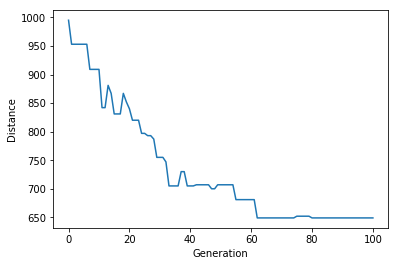

[23, 17, 6, 8, 4, 24, 19, 21, 12, 9, 5, 0, 2, 7, 11, 15, 10, 14, 22]
Initial distance: 1014.0
Final distance: 623.0
623.0 : route = [10, 14, 22, 18, 4, 12, 6, 8, 0, 11, 20, 24, 19, 23, 17, 16, 1, 2]


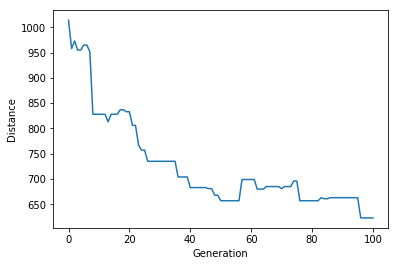

[10, 14, 22, 18, 4, 12, 6, 8, 0, 11, 20, 24, 19, 23, 17, 16, 1, 2]
Initial distance: 192.0
Final distance: 160.0
160.0 : route = [17, 23, 18, 22]


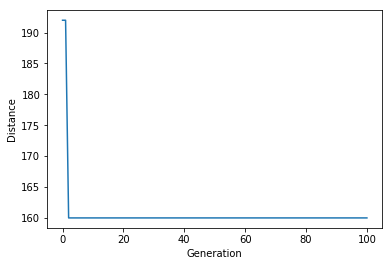

bestroute found = [17, 23, 18, 22] : dist= 160.0


In [39]:
k=25
source=23
destination=3
population=[i for i in range(k)]
g=Graph(len(population))
population.remove(destination)

try:
    route,mindist=geneticAlgorithm(g,population, popSize=100, eliteSize=20, mutationRate=0.01, generations=100,source=source,destination=destination,size=k-1)
except ZeroDivisionError:
    route,mindist=geneticAlgorithm(g,population, popSize=100, eliteSize=20, mutationRate=0.01, generations=100,source=source,destination=destination,size=k-1)
    
    
tillnow=route
tilldist=mindist
for j in range(10):
    print(route)
    for i in range(len(route)-1,-1,-1):
        
        if route[i]==source:
            newsize=len(route)-i-1
        
            break
    if newsize==0:
        break
    try:
       
        route,mindist=geneticAlgorithm(g,population, popSize=100, eliteSize=20, mutationRate=0.01, generations=100,source=source,destination=destination,size=newsize)
        if mindist<tilldist:
            
            tillnow=route
            tilldist=mindist
            #print(tillnow,tilldist)
    except ZeroDivisionError:
        continue

print('bestroute found =',tillnow,': dist=',tilldist)

In [40]:
print(g.dist_mat[3][23])        

36.0


In [41]:
class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return (heapq.heappop(self.elements)[1])
def neighb(graph, current):
    lis=[]
    for i in range(len(graph)):
        if graph[current][i]!=0 and graph[current][i]!=math.inf:
            lis.append(i)
        if graph[i][current]!=0 and graph[current][i]!=math.inf:
            lis.append(i)
    return np.unique(lis)
    

def astar(graph, start, goal):
    startTime = time.time()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    s_path={start:0}
    while not frontier.empty():
        current = frontier.get()        
        if current == goal:
            #print(goal)
            break
        dic={}
        minimum=0
        for next in neighb(graph, current):
            
            new_cost = cost_so_far[current] + graph[current][next]
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + graph[goal][next]#change to heuristic
                frontier.put(next, priority)
                
                dic.update({next:priority})
                came_from[next] = current
            sorted_list=sorted(dic.items(), key=operator.itemgetter(1))
            res_list = [i[0] for i in sorted_list]
            if res_list!=[]:
                minimum=res_list[0]
        s_path.update({minimum:dic[minimum]})
    print("A star algorithm")
    print("The shortest path", s_path)
    print("The cost of the path:",cost_so_far[goal])
    endTime = time.time()
    print('Time taken', endTime - startTime)

In [43]:
def minDistance(dist, sptSet): 
        min = sys.maxsize 
        # Search not nearest vertex not in the  
        # shortest path tree 
        for v in range(g.cities): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v  
        return min_index 
    
def dijkstra(g, src, dest):
    startTime = time.time()
    dist = [sys.maxsize] * g.cities
    dist[src] = 0
    sptSet = [False] * g.cities
    parent={src:None}
    for cout in range(g.cities): 
        u = minDistance(dist, sptSet)
        sptSet[u] = True
        for v in range(g.cities): 
            if g.dist_mat[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + g.dist_mat[u][v]: 
                    dist[v] = dist[u] + g.dist_mat[u][v]
                    parent[v] = (u,dist[v])
    print('Dijkstra (Backtracking) approach')
    output = [dest]
    curr = parent[dest]
    while curr is not None:
        output.insert(0,curr)
        curr = parent[curr[0]]
    print('Shortest path', output)        
    endTime = time.time()
    print('Time taken', endTime - startTime)



graph=g.dist_mat
astar(graph,source, destination)
print()
dijkstra(g, source, destination)

A star algorithm
The shortest path {23: 0, 3: 36.0}
The cost of the path: 36.0
Time taken 0.0018203258514404297

Dijkstra (Backtracking) approach
Shortest path [(23, 36.0), 3]
Time taken 0.0004105567932128906
